In [56]:
import json
import csv
import glob
from pathlib import Path

inputpath = glob.glob(str(Path.cwd().parent / "data" / "pages_*.csv"))
inputpath = list(filter(lambda p: Path(p).name.startswith("pages_") and Path(p).name.endswith(".csv"), inputpath))
assert len(inputpath) > 0
inputpath.sort()
inputpath = inputpath[-1]
inputfile = list(csv.reader(open(inputpath, "r")))
header = [word for word in inputfile[0]]
body = inputfile[1:]

dicts = list(map(lambda row: dict(zip(header, row)), body))  # convert to dict
dicts = list(map(lambda elem: {k: (v if v != "" else None) for k, v in elem.items()}, dicts))  # get null

# get elem with least fields being null
elem = min(dicts, key=lambda elem: sum([1 for v in elem.values() if v is None]))

# truncate string values to 100 characters
elem = {k: (v[:100] + "..." if type(v) is str and len(v) > 100 else v) for k, v in elem.items()}

# print json
print(json.dumps(elem, indent=4, sort_keys=True, ensure_ascii=False))

{
    "agreement_commission_fee": "101370.0",
    "agreement_last_updated": "23.08.2024 06:10",
    "broker_id": "georg mels-colloredo",
    "company_address": "tegetthoffstraße 71010 wien, 01. bezirk, innere stadt",
    "company_id": "19554",
    "company_name": "3si makler gmbh",
    "company_url": "https://www.3si.at",
    "property_availabilty": null,
    "property_balcony": "16.97",
    "property_building_type": "altbau",
    "property_completion": "2024",
    "property_condition": "erstbezug",
    "property_district": "1130",
    "property_energy_certificate": "d",
    "property_features": "terrasse, balkon, wintergarten, garten",
    "property_floor": "1",
    "property_flooring": "parkett",
    "property_garden": "112.44",
    "property_heating": "etagenheizung",
    "property_id": "https://www.willhaben.at/iad/immobilien/d/eigentumswohnung/wien/wien-1130-hietzing/zeitlose-eleganz-...",
    "property_living_area": "181.44",
    "property_loggia": null,
    "property_monthly_cos

# sketch schema

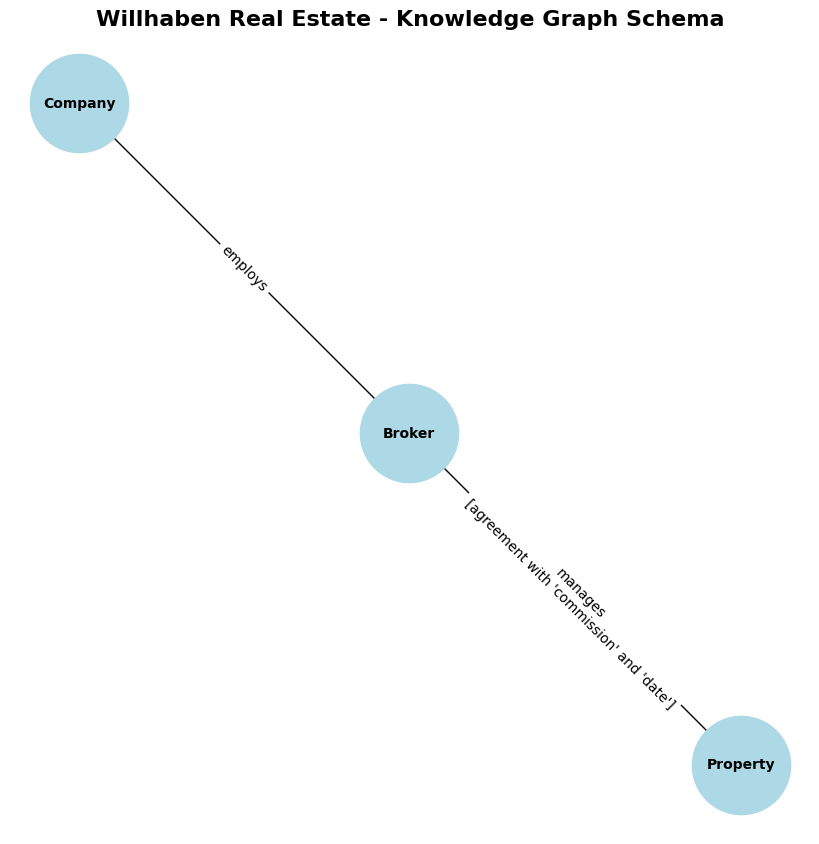

In [61]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
plt.figure(figsize=(8, 8))

G.add_edge("Broker", "Company", label="employs", weight=2)
G.add_edge("Broker", "Property", label="manages\n[agreement with 'commission' and 'date']", weight=2)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=5000, font_size=10, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Willhaben Real Estate - Knowledge Graph Schema", fontsize=16, fontweight="bold")
plt.axis("off")
plt.show()